### Análise sobre os imóveis disponíveis no Airbnb em Nova York

#### Sobre os títulos e regras:
* De acordo com a nuvem de palavras dos títulos dos imóveis, percebe-se um grande foco em especificar que a acomodação está localizada no Brooklyn, provavelmente devido a este ser uma das regiões mais famosas de Nova York. A afirmação de que essa maior frequência é devida a maior concentração de imóveis nessa região não se sustenta, uma vez que Manhattam possui mais alocações mas é bem menos citada nos títulos
* Adjetivos como espaçoso, aconchegante, moderno, charmoso, luxuoso e ensolarado também são destacáveis.
* Acerca das regras das locações, destaque para questões como as permissões para fumar, a de pets e alertas sobre barulhos altos/festas.

#### Sobre os tipos de imóveis e suas localizações
* Presença majoritária de apartamento completos, com destaque para a maior discrepância no Brooklyn e em Manhattam. Demais bairros com proporção mais igualitária.
* Quartos compartilhados são extremamente raros, não havendo nenhum em Staten Island
* Mais de 80% de todos os imóveis localizados no Brooklyn e em Manhattam
* Maior frequência de apartamentos completos no sul de Manhattam e norte do Brooklyn, em regiões vizinhas, já há a maior frequência de locação apenas de quartos próprios ao leste dessas regiões, em direção ao Queens e ao Bronx

#### Sobre os preços e suas correlações
* Os preços tendem a serem mais caros em imóveis próximos do litoral e de parques, destaque para os arredores do Highland Park, no Brooklyn, o Staten Island Zoo e o Central Park.
* Relação entre preços e taxa de serviço positiva, como é esperado, apesar de houver alguns registros que fogem dessa regra, sejam por serem desproporcionais, muito altos ou muito baixos.
* Não parece haver correlação entre o preço e variáveis como o número de análises, a quantidade de dias disponíveis no mês ou o ano de construção do imóvel. Há apenas uma correlação extremamente fraca com o mínimo de noites, sendo praticamente desprezível.
* Quartos compartilhados no Queens são os mais caros , apesar de possuírem uma variação de preços maior, em contrapartida ao Brooklyn, com os mais baratos, nesse tipo de acomodação todos os bairros possuem grande diversidade de preços.
* Nos quartos particulares, o Queens também possui as acomodações mais caras, com pouca variação, já Staten Island possui os mais baratos, mas com uma diferença bem maior.
* Em apartamentos completos, o Brooklyn possui os mais caros e o Bronx os mais baratos. Destaque também para as grandes variações em Staten Island
* O ano de construção do imóvel parece não influenciar nos preços, com acomodações de 2004 com o mesmo preço, ou muito similar, àqueles construídos em 2021. Apesar disso, há uma presença de preços menores e mais uniformes em prédios de 2003, 2012 e 2017, por algum motivo

#### Outras observações
* Distribuição quase igualitária sobre política de cancelamento, com flexível, estrita e moderada com 1/3 cada. Indicando diversidade de metodologias de anfitriões
* Também há distribuição quase igual entre anfitriões com identidade verificada e os que não possuem essa validação

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv('data/Airbnb_Open_Data_Clean.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\higor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\higor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
# Função para tratar os títulos
def process_title(title):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(title)
    filtered_title = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_title)

In [25]:
# Aplicar o processamento aos títulos
df['processed_title'] = df['NAME'].dropna().apply(process_title)

# Concatenar todos os títulos processados em uma única string
all_processed_titles = ' '.join(df['processed_title'].dropna())


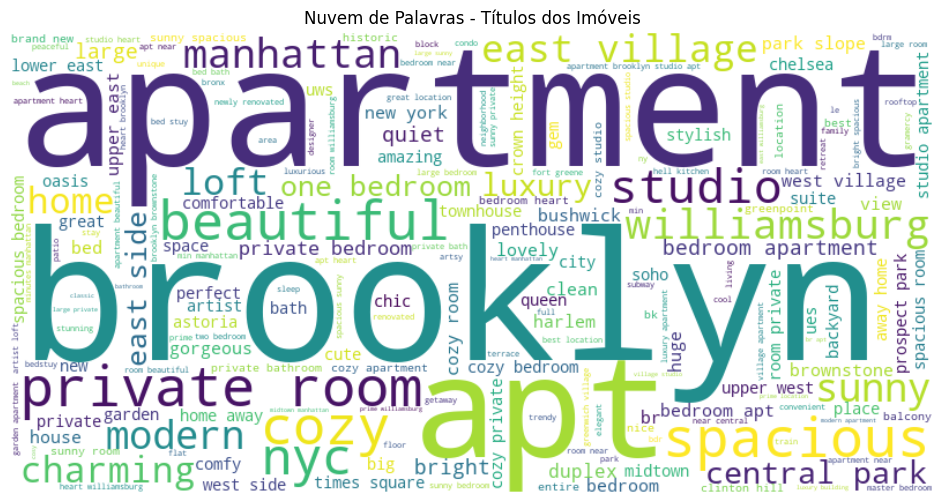

In [26]:
# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_processed_titles)

# Exibir a nuvem de palavras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Títulos dos Imóveis')
plt.show()

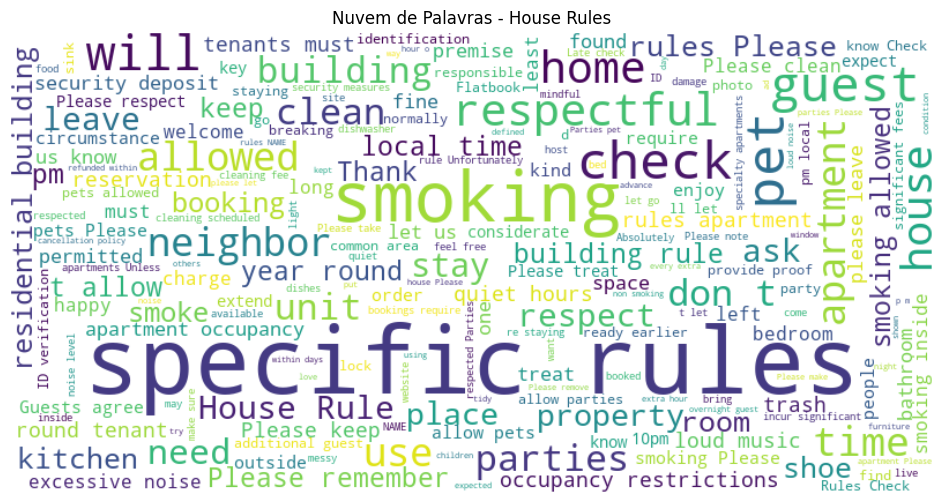

In [27]:
# Concatenar todas as regras em uma única string
all_house_rules = ' '.join(df['house_rules'].dropna())

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_house_rules)

# Exibir a nuvem de palavras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - House Rules')
plt.show()

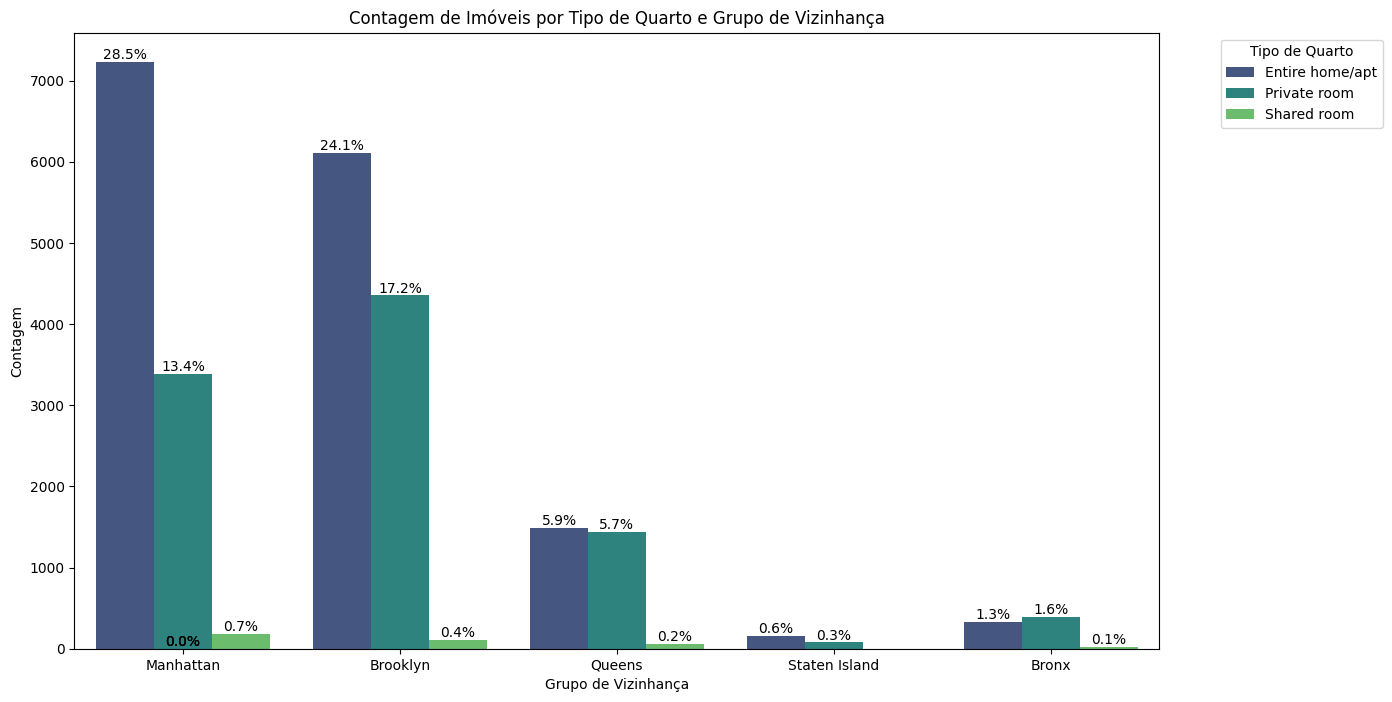

In [38]:
plt.figure(figsize=(14, 8))

# Criar um gráfico de barras empilhadas para 'room type' por 'neighbourhood group'
sns.countplot(x='neighbourhood group', hue='room type', data=df, palette='viridis')

# Adicionar porcentagens no topo das barras
total = len(df['neighbourhood group'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height / total:.1%}', ha='center', va='bottom')

plt.title('Contagem de Imóveis por Tipo de Quarto e Grupo de Vizinhança')
plt.xlabel('Grupo de Vizinhança')
plt.ylabel('Contagem')
plt.legend(title='Tipo de Quarto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


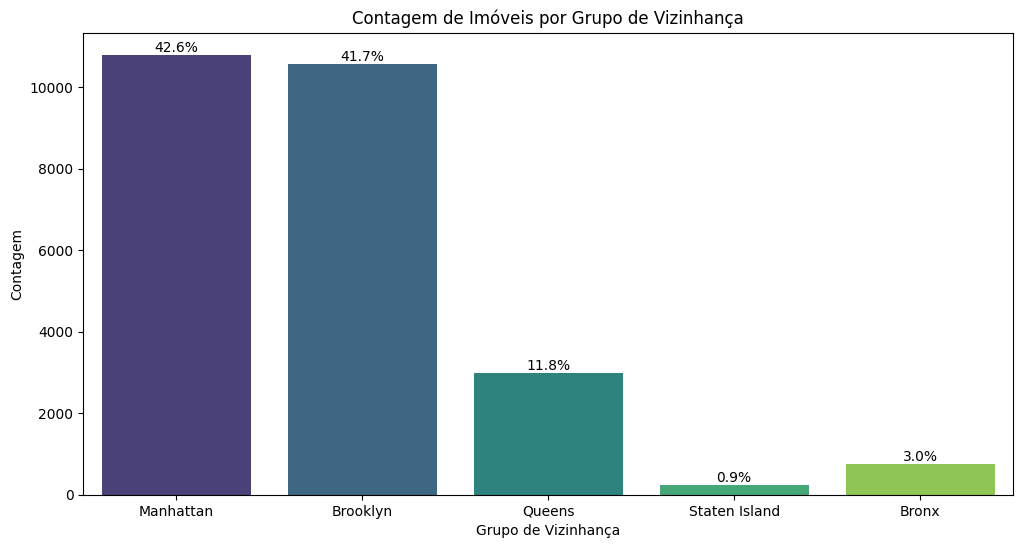

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='neighbourhood group', data=df, palette='viridis')

# Adicionar porcentagens no topo das barras
total = len(df['neighbourhood group'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height / total:.1%}', ha='center', va='bottom')

plt.title('Contagem de Imóveis por Grupo de Vizinhança')
plt.xlabel('Grupo de Vizinhança')
plt.ylabel('Contagem')
plt.show()

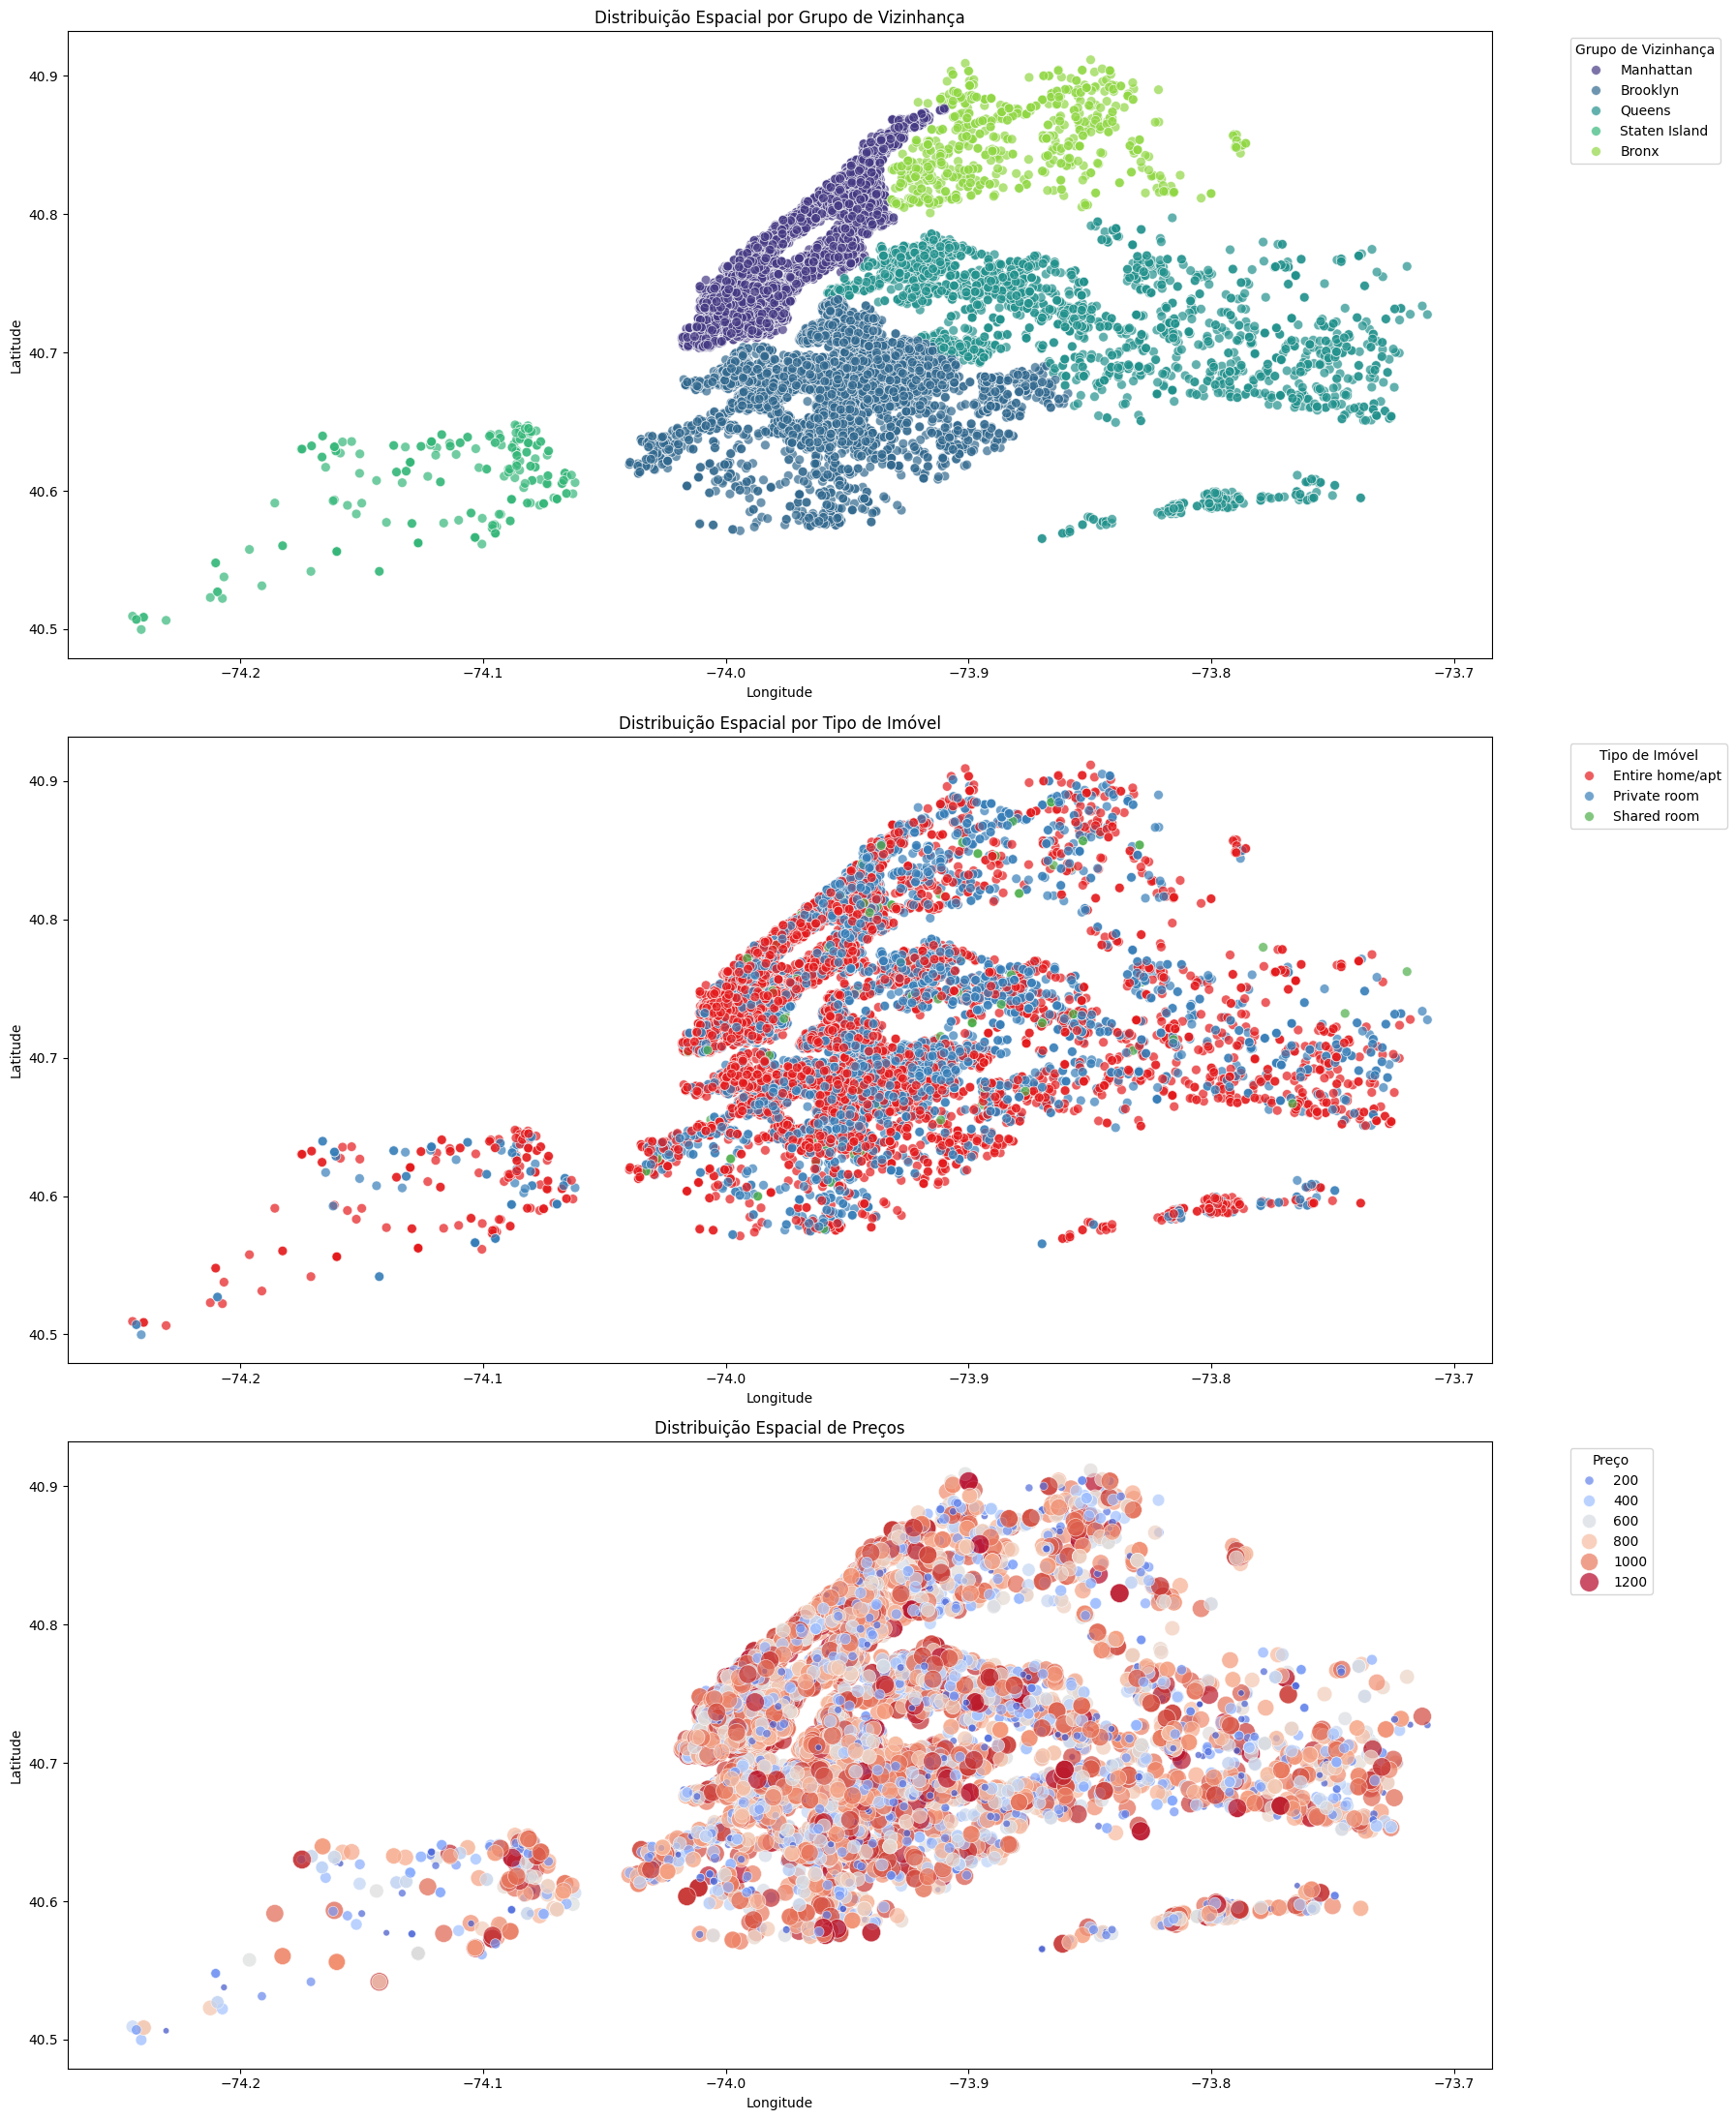

In [29]:
# Ajustar o tamanho dos gráficos
plt.figure(figsize=(18, 22))

# Gráfico para a distribuição espacial por grupo de vizinhança
plt.subplot(3, 1, 1)
sns.scatterplot(x='long', y='lat', data=df, hue='neighbourhood group', palette='viridis', alpha=0.7, s=50)
plt.title('Distribuição Espacial por Grupo de Vizinhança')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Grupo de Vizinhança', bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico para a distribuição espacial por tipo de imóvel
plt.subplot(3, 1, 2)
sns.scatterplot(x='long', y='lat', data=df, hue='room type', palette='Set1', alpha=0.7, s=50)
plt.title('Distribuição Espacial por Tipo de Imóvel')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Tipo de Imóvel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico para a distribuição espacial de preços
plt.subplot(3, 1, 3)
sns.scatterplot(x='long', y='lat', data=df, hue='price', palette='coolwarm', size='price', sizes=(20, 200), alpha=0.7)
plt.title('Distribuição Espacial de Preços')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Preço', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

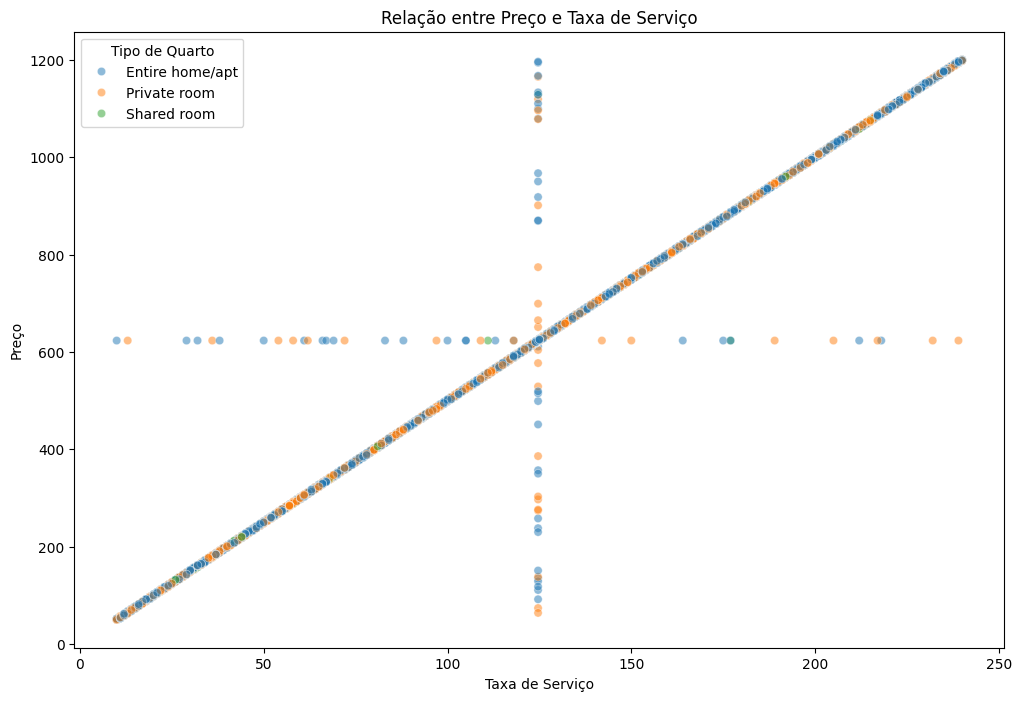

In [46]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='service fee', y='price', hue='room type', data=df, alpha=0.5, palette='tab10')
plt.title('Relação entre Preço e Taxa de Serviço')
plt.xlabel('Taxa de Serviço')
plt.ylabel('Preço')
plt.legend(title='Tipo de Quarto')
plt.show()

In [59]:
hm_cols = [
    'price',
    'Construction year',
    'service fee',
    'minimum nights', 
    'number of reviews', 
    'reviews per month',
    'review rate number', 
    'availability 365'
]

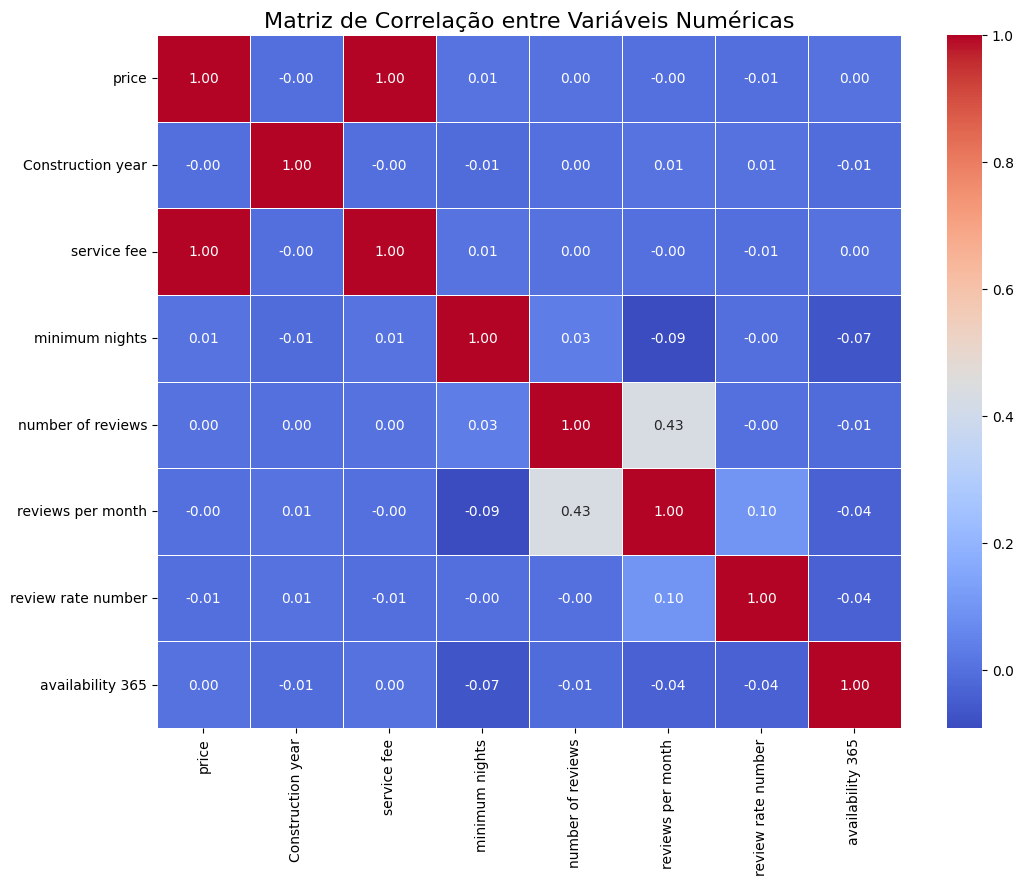

In [61]:
# Calcular a matriz de correlação
correlation_matrix = df[hm_cols].corr()

# Configurar o tamanho da figura
plt.figure(figsize=(12, 9))

# Criar um mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Configurar o título
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16)

# Exibir o mapa de calor
plt.show()

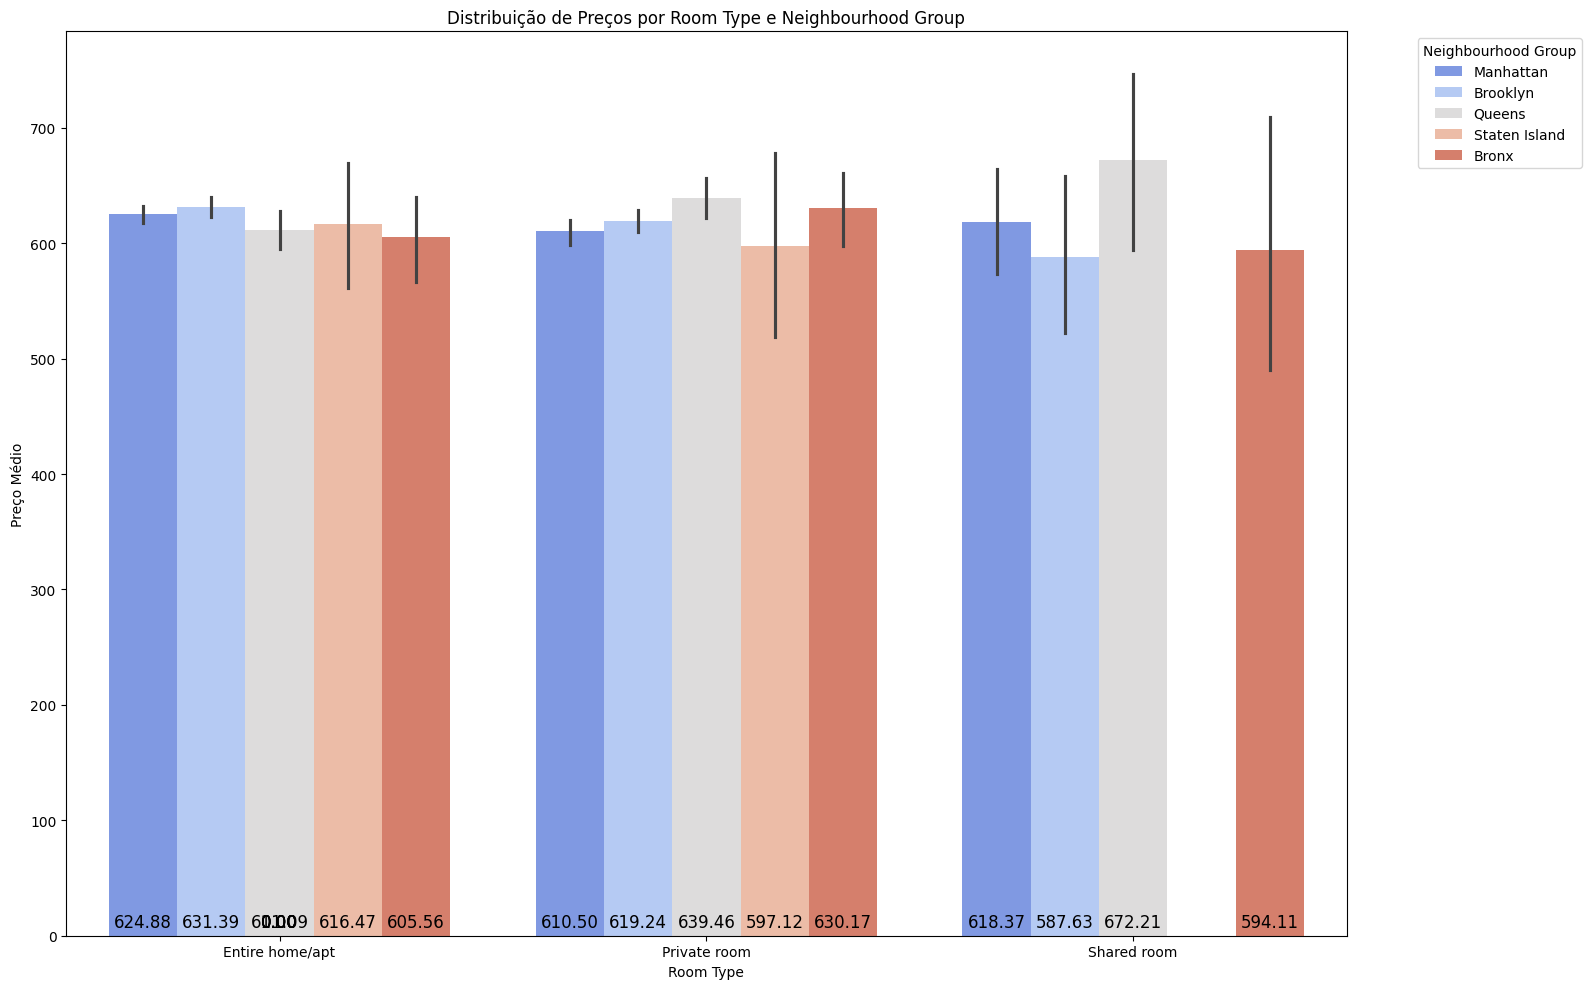

In [56]:
# Configurar o tamanho da figura
plt.figure(figsize=(16, 10))

# Gráfico de barra empilhada para 'room type'
ax = plt.subplot(1, 1, 1)
sns.barplot(x='room type', y='price', hue='neighbourhood group', data=df, palette='coolwarm', ax=ax)

# Adicionar valores na base das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., 0),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')

plt.title('Distribuição de Preços por Room Type e Neighbourhood Group')
plt.xlabel('Room Type')
plt.ylabel('Preço Médio')

# Mover a legenda para fora do gráfico
ax.legend(title='Neighbourhood Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


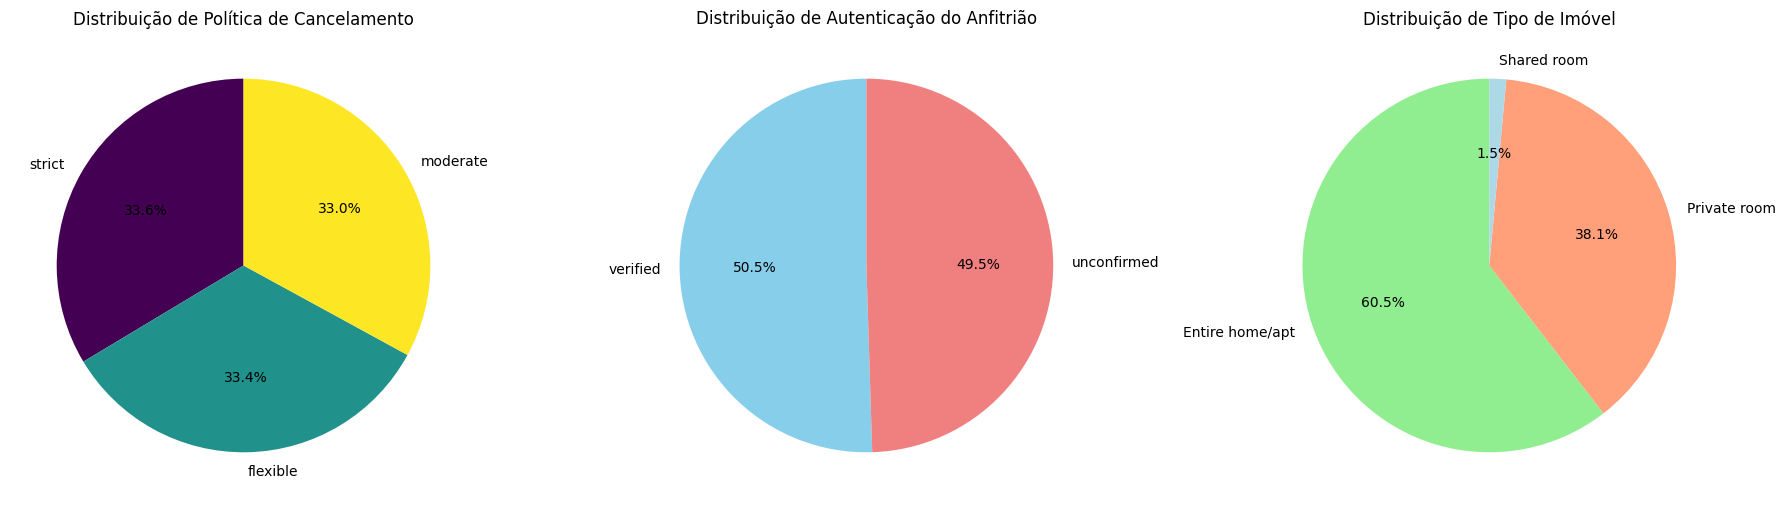

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de Pizza para Política de Cancelamento
df['cancellation_policy'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90, cmap='viridis')
axes[0].set_title('Distribuição de Política de Cancelamento')
axes[0].set_ylabel('')

# Gráfico de Pizza para Autenticação do Anfitrião
df['host_identity_verified'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axes[1].set_title('Distribuição de Autenticação do Anfitrião')
axes[1].set_ylabel('')

# Gráfico de Pizza para Tipo de Imóvel
df['room type'].value_counts().plot.pie(ax=axes[2], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightsalmon', 'lightblue', 'lightpink'])
axes[2].set_title('Distribuição de Tipo de Imóvel')
axes[2].set_ylabel('')

# Ajustar layout
plt.tight_layout()
plt.show()


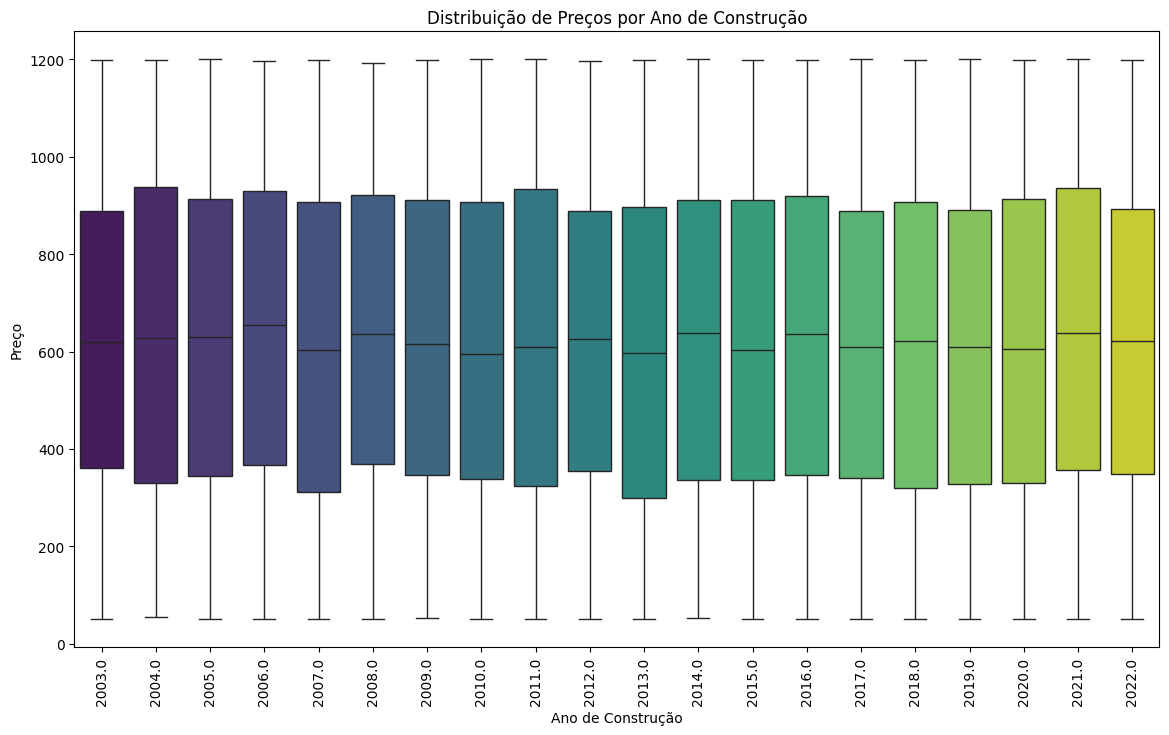

In [35]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Construction year', y='price', data=df, palette='viridis')
plt.title('Distribuição de Preços por Ano de Construção')
plt.xlabel('Ano de Construção')
plt.ylabel('Preço')
plt.xticks(rotation=90)
plt.show()